In [1]:
import tensorflow as tf
from tensorflow import keras
keras.__version__

'2.6.0'

In [2]:
import os
inlier_path = os.path.join('fingerprint\inliers')
fnames = [os.path.join(inlier_path, fname) for fname in os.listdir(inlier_path)]
print('total available inliners:',len(fnames))

total available inliners: 128


In [3]:
import numpy as np
#np.linspace(0.3,0.7,100)

In [4]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
      rotation_range=90,
      width_shift_range=0.5,
      height_shift_range=0.5,
      shear_range=0.5,
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='nearest')

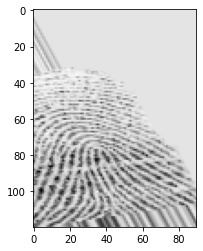

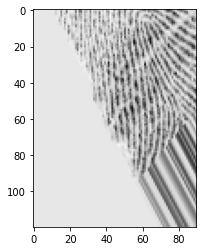

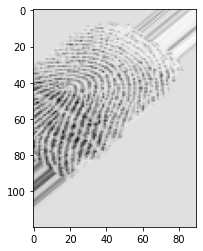

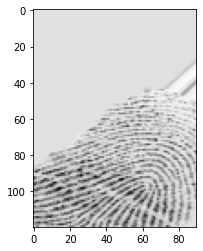

In [5]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

test_img = image.load_img(fnames[0],target_size = (120,90))

x = image.img_to_array(test_img)
x = x.reshape((1,)+x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [6]:
outlier_path = os.path.join('fingerprint\outliers')

for img in fnames:
    test_img = image.load_img(img,target_size = (120,90))

    x = image.img_to_array(test_img)
    x = x.reshape((1,)+x.shape)

    for batch in datagen.flow(x, batch_size = 1):
        out = image.array_to_img(batch[0])
        path_dir = img.split('\\')
        new_name = path_dir[-1].split('.')
        new_name[0] += '_out'
        path_dir[-1] = '.'.join(new_name)
        path_dir[1] = 'outliers'
        new_img = '\\'.join(path_dir)
        image.save_img(new_img,out)
        break